In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
import pandas as pd
import seaborn as sns
  
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import fcluster, linkage

In [15]:
# Generate initial data
data = np.vstack(( (rand(30, 2) + 1),  (rand(30,2)+2.5), (rand(30,2)+4)  ))
data[0:5]

array([[1.60696323, 1.29031716],
       [1.43267033, 1.92359765],
       [1.37948635, 1.52830052],
       [1.44443835, 1.95846068],
       [1.08550729, 1.24315613]])

In [16]:
# standardize (normalize) the features
data = whiten(data)
data[0:5]

array([[1.25780781, 1.00650274],
       [1.12138467, 1.50048869],
       [1.07975632, 1.19213997],
       [1.13059578, 1.52768335],
       [0.84965202, 0.96971512]])

In [17]:
# Compute the distance matrix
matrix = linkage(    data,    method='ward',    metric='euclidean'    )
np.around(matrix,2)[1:5]

array([[7.1e+01, 8.1e+01, 1.0e-02, 2.0e+00],
       [8.3e+01, 8.4e+01, 1.0e-02, 2.0e+00],
       [9.0e+00, 1.3e+01, 2.0e-02, 2.0e+00],
       [1.1e+01, 1.7e+01, 2.0e-02, 2.0e+00]])

In [18]:
# Assign cluster labels
labels = fcluster(matrix, 3,  criterion='maxclust'    )
labels[1:5]

array([1, 1, 1, 1], dtype=int32)

In [19]:
# Create DataFrame
df = pd.DataFrame(data, columns=['x','y'])
df['labels'] = labels
df.head()

,x,y,labels
0,1.257808,1.006503,1
1,1.121385,1.500489,1
2,1.079756,1.192140,1
3,1.130596,1.527683,1
4,0.849652,0.969715,1


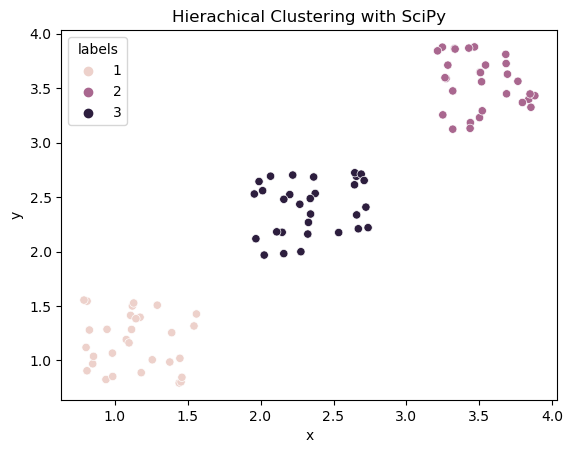

In [20]:
# Plot Clusters
sns.scatterplot(    x='x',    y='y',    hue='labels',    data=df)
plt.title('Hierachical Clustering with SciPy')
plt.show()

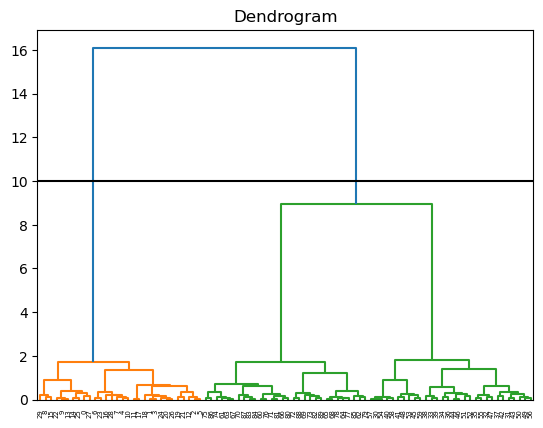

In [39]:
from scipy.cluster.hierarchy import dendrogram
dn = dendrogram(matrix)
plt.title('Dendrogram')
plt.axhline(y=10, c='black')
plt.show()

In [25]:
Z = linkage(matrix, method='single')
Z[0:5]

array([[84.        , 85.        ,  1.41421878,  2.        ],
       [86.        , 89.        ,  1.4181656 ,  3.        ],
       [ 5.        ,  8.        ,  2.23607865,  2.        ],
       [55.        , 58.        ,  2.23619714,  2.        ],
       [ 0.        ,  9.        ,  2.23629954,  2.        ]])

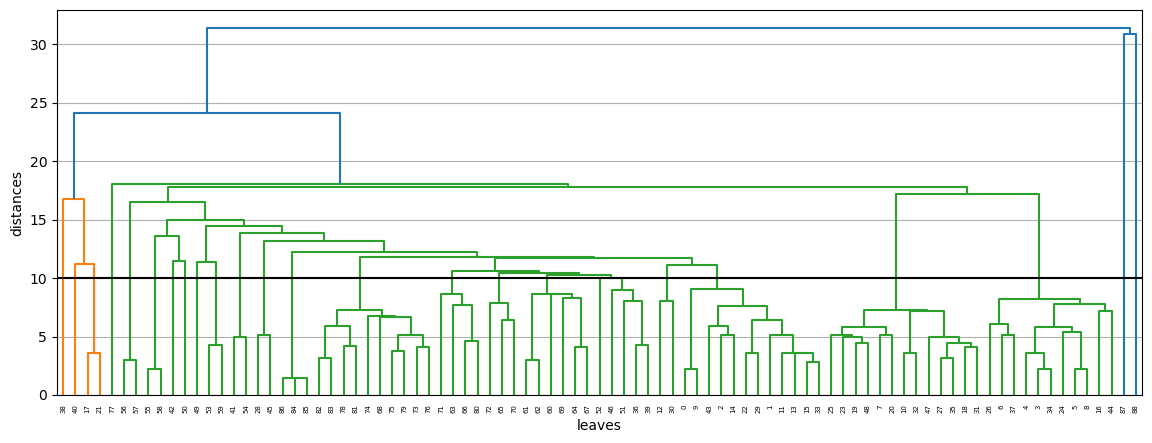

In [38]:
plt.figure(figsize=(14, 5))
dendrogram(Z);
plt.grid(axis='y'); plt.xlabel('leaves'); plt.ylabel('distances');
plt.axhline(y=10, c='black')
plt.show();

In [24]:
nbr_of_leaves = Z.shape[0] + 1
nbr_of_leaves

89

In [28]:
Z[:, 2]

array([ 1.41421878,  1.4181656 ,  2.23607865,  2.23619714,  2.23629954,
        2.23811153,  2.82876739,  3.00000148,  3.00000957,  3.16235952,
        3.16253651,  3.60555541,  3.60556234,  3.60560187,  3.60599076,
        3.6060142 ,  3.60662074,  3.75381682,  4.12325564,  4.12335426,
        4.12350325,  4.14946361,  4.24265071,  4.2428543 ,  4.47218291,
        4.47327709,  4.62078095,  5.00000679,  5.00044154,  5.00049802,
        5.09902797,  5.09902805,  5.09910599,  5.09918528,  5.09919444,
        5.09942014,  5.09980439,  5.38526585,  5.83096532,  5.83119089,
        5.86384891,  5.91670199,  6.08293525,  6.40347996,  6.4035975 ,
        6.63719891,  6.78234026,  7.2112692 ,  7.21162   ,  7.28034111,
        7.28579094,  7.61583964,  7.68129336,  7.81030874,  7.87472904,
        8.06237493,  8.06243409,  8.24624417,  8.30662446,  8.6024664 ,
        8.60307867,  8.66033661,  9.00007676,  9.05539961, 10.05009711,
       10.24706647, 10.4406317 , 10.63023303, 11.09053988, 11.18

In [32]:
height=15
merge_heights = Z[:, 2]
nbr_of_clusters  = nbr_of_leaves - np.digitize(height, merge_heights)
nbr_of_clusters

10